In [59]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score 
from sklearn.metrics import recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from sklearn.utils.class_weight import compute_class_weight 

In [60]:
# Load dataset (update the path to your dataset)
url= 'glass.csv'
df = pd.read_csv(url) 

In [61]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(df.info())
print(df['Type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


C:\Users\jayme\AppData\Local\Temp\ipykernel_8568\2330139275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='viridis')


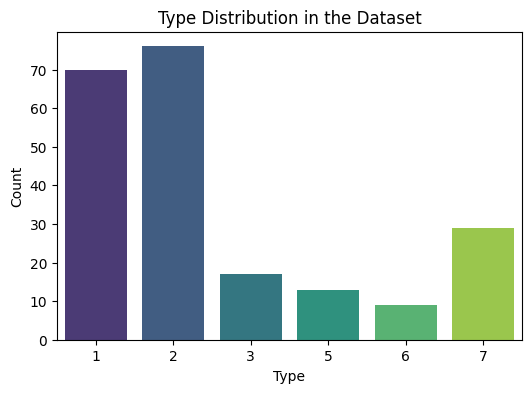

In [63]:
# 1. Plot the class distribution to show imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df, palette='viridis')
plt.title('Type Distribution in the Dataset')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

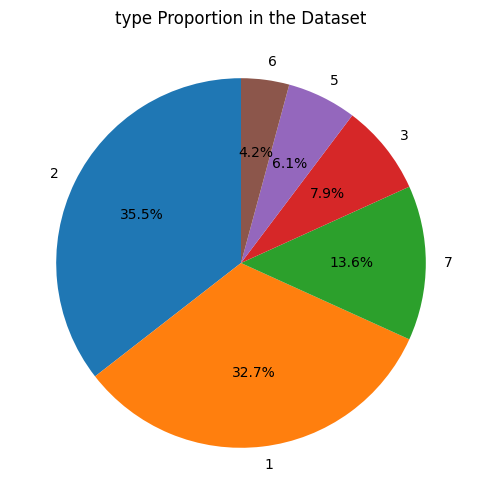

In [64]:
# 2. Plot a pie chart to visualize class proportions
plt.figure(figsize=(6, 6))
class_counts = df['Type'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('type Proportion in the Dataset')
plt.show()

In [65]:
# Features and Target
X = df.drop('Type', axis=1)
y = df['Type']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [66]:
# Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train) 

In [67]:
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train) 

In [68]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train) 

In [69]:
# Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train) 

In [70]:
# Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

In [71]:
# Function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test, class_weights=None):
    model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    print("AUC Score:", auc)

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'AUC': roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    }


In [72]:
# Evaluate each sampling technique
print("Random Undersampling:")
evaluate_model(X_rus, y_rus, X_test, y_test)

print("\nRandom Oversampling:")
evaluate_model(X_ros, y_ros, X_test, y_test)

print("\nSMOTE:")
evaluate_model(X_smote, y_smote, X_test, y_test)

print("\nTomek Links:")
evaluate_model(X_tl, y_tl, X_test, y_test)

print("\nClass Weights:")
evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict) 

Random Undersampling:
              precision    recall  f1-score   support

           1       0.77      0.48      0.59        21
           2       0.91      0.43      0.59        23
           3       0.21      0.80      0.33         5
           5       0.50      1.00      0.67         4
           6       0.60      1.00      0.75         3
           7       1.00      1.00      1.00         9

    accuracy                           0.62        65
   macro avg       0.66      0.79      0.65        65
weighted avg       0.78      0.62      0.64        65

AUC Score: 0.8228264503872649

Random Oversampling:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        21
           2       0.89      0.74      0.81        23
           3       0.50      0.60      0.55         5
           5       0.67      1.00      0.80         4
           6       0.75      1.00      0.86         3
           7       0.89      0.89      0.89         9

   

{'Accuracy': 0.8307692307692308,
 'Precision': 0.8396153846153847,
 'Recall': 0.8307692307692308,
 'F1-Score': 0.8266332937468368,
 'AUC': np.float64(0.946443720214212)}

In [73]:
# Combine X and y for each sampling method
df_rus = pd.concat([X_rus, y_rus], axis=1)
df_ros = pd.concat([X_ros, y_ros], axis=1)
df_smote = pd.concat([X_smote, y_smote], axis=1)
df_tl = pd.concat([X_tl, y_tl], axis=1)

# Save to CSV
df_rus.to_csv('Random_Undersampling_Balanced.csv', index=False)
df_ros.to_csv('Random_Oversampling_Balanced.csv', index=False)
df_smote.to_csv('SMOTE_Balanced.csv', index=False)
df_tl.to_csv('TOMEK_Links_balanced.csv', index=False)


In [74]:
samplers = {
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'Random Oversampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Tomek Links': TomekLinks()
}

In [75]:
results = {}

for name, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_train, y_train)
    result = evaluate_model(X_res, y_res, X_test, y_test)
    results[name] = result
    # Save balanced datasets
    balanced_df = pd.concat([X_res, y_res], axis=1)
    balanced_df.to_csv(f'{name.replace(" ", "_")}_Balanced.csv', index=False)

# Evaluate Class Weight Method
results['Class Weights'] = evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict)

# Store Results in DataFrame
comparison_df = pd.DataFrame(results).T
print("\nComparison Table of Model Performance:\n")
print(comparison_df)

# Save Comparison Table
comparison_df.to_csv('Sampling_Techniques_Comparison.csv')


              precision    recall  f1-score   support

           1       0.77      0.48      0.59        21
           2       0.91      0.43      0.59        23
           3       0.21      0.80      0.33         5
           5       0.50      1.00      0.67         4
           6       0.60      1.00      0.75         3
           7       1.00      1.00      1.00         9

    accuracy                           0.62        65
   macro avg       0.66      0.79      0.65        65
weighted avg       0.78      0.62      0.64        65

AUC Score: 0.8228264503872649
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        21
           2       0.89      0.74      0.81        23
           3       0.50      0.60      0.55         5
           5       0.67      1.00      0.80         4
           6       0.75      1.00      0.86         3
           7       0.89      0.89      0.89         9

    accuracy                           0.83    